In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("who_suicide_statistics.xlsx")
df.to_csv("dataset.csv", sep=",")

In [3]:
data=pd.read_csv('dataset.csv')

In [4]:
data.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population
0,0,Albania,1985,female,15-24 years,NaN,277900.0
1,1,Albania,1985,female,25-34 years,NaN,246800.0
2,2,Albania,1985,female,35-54 years,NaN,267500.0
3,3,Albania,1985,female,5-14 years,NaN,298300.0
4,4,Albania,1985,female,55-74 years,NaN,138700.0


In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


# 1) Data Wrangling

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [8]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [9]:
data.describe(include='object')

,country,sex,age
count,43776,43776,43776
unique,141,2,6
top,Netherlands,male,25-34 years
freq,456,21888,7296


In [10]:
data.shape

(43776, 6)

In [11]:
# Handling Missing value
data.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [12]:
data=data.fillna(0)

In [13]:
data.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

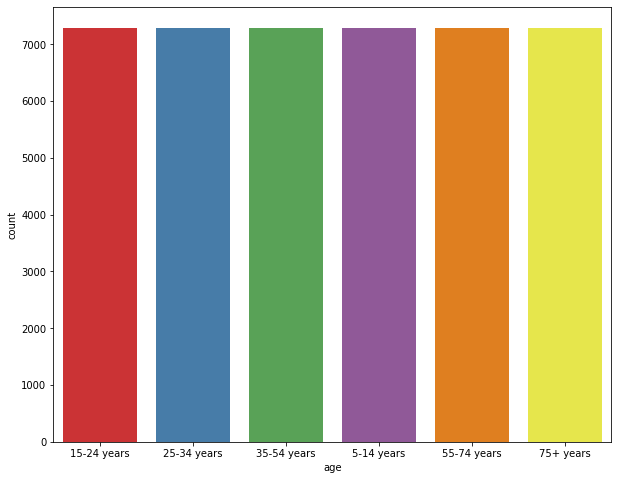

In [14]:
plt.figure(figsize=(10,8))
sns.countplot('age',data=data,palette='Set1')

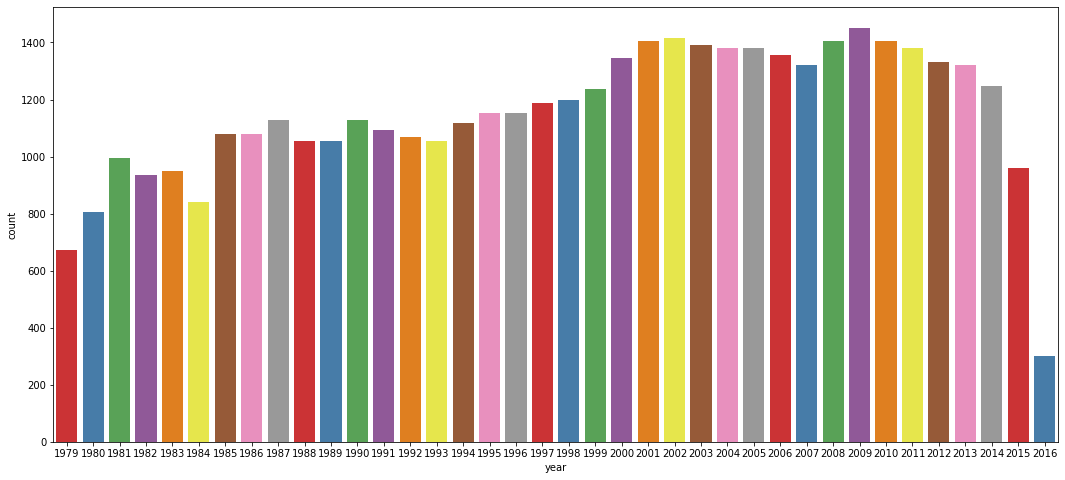

In [15]:
plt.figure(figsize=(18,8))
sns.countplot('year',data=data,palette='Set1')

In [16]:
df['country'].value_counts()

Netherlands    456
Iceland        456
Mauritius      456
Austria        456
Hungary        456
              ... 
Tunisia         24
Iraq            12
Macau           12
Cabo Verde      12
Zimbabwe        12
Name: country, Length: 141, dtype: int64

In [17]:
df['country'].nunique()

141

In [18]:
df['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

# 2) EDA

In [19]:
# Replace 0 values with, NA
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['population'].mean()

data['population']=data['population'].fillna(mean_value)

In [20]:
mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

## Task 1: Which year has the most suicide and Which year has the least suicides?

In [21]:
def most_least_suicide(x):
     #use the function 'idmin' to find the index of lowest suicide
    mini = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    maxn = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[maxn,:])
    low = pd.DataFrame(data.loc[mini,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][maxn])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][mini])
    return pd.concat([high,low],axis = 1)

most_least_suicide('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338,1
population,1.90442e+07,35600


Text(0, 0.5, 'Suicide Count')

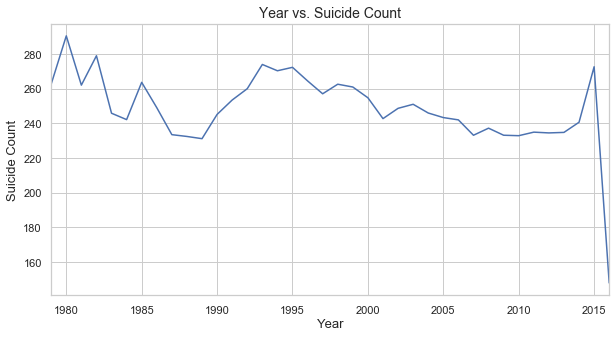

In [23]:
data.groupby('year')['suicides_no'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)


## Task 2: Which Country has most suicide and which country has least suicide?

In [24]:
def most_least_suicide(x):
     #use the function 'idmin' to find the index of lowest suicide
    mini = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    maxn = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[maxn,:])
    low = pd.DataFrame(data.loc[mini,:])
    
    #print the Year with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][maxn])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][mini])
    return pd.concat([high,low],axis = 1)

most_least_suicide('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338,1
population,1.90442e+07,35600


## Task 3: Which country has most and least suicide per population ratio?

In [25]:
#calculate mean of suicides_no col
meanSuicide = data['suicides_no'].mean()
#calculate mean of pop. col
meanPop = data['population'].mean()
    
# drops any Na rows
data = data.dropna()    
    
# Replace 0 or NaN suicides_no, with the mean Suicide    
data['suicides_no'] = data['suicides_no'].replace(np.NAN,meanSuicide)

# Replace 0 or NaN populations, with the mean Populations
data['population'] = data['population'].replace(np.NAN,meanPop)
data['population'] = data['population'].replace(0,meanPop)

In [28]:
data['suicide_per_pop'] = data.apply(lambda row: row.suicides_no / row.population, axis = 1) 

data.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931


In [29]:
most_least_suicide('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Rodrigues
Country Which Has Lowest suicide_per_pop  :  Egypt


,32351,12993
country,Rodrigues,Egypt
year,2004,2005
sex,male,male
age,75+ years,5-14 years
suicides_no,249.106,1
population,259,9.54309e+06
suicide_per_pop,0.9618,1.04788e-07


Text(0, 0.5, 'Suicide Count')

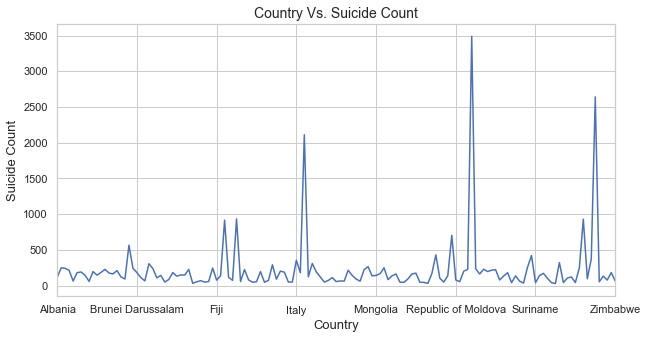

In [30]:
data.groupby('country')['suicides_no'].mean().plot()

#setup the title and labels of the figure.
plt.title("Country Vs. Suicide Count",fontsize = 14)
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)


## Task 4: Age group and no of Suicides relation ?

In [35]:
smp=data.sample(3)

In [36]:
smp

,country,year,sex,age,suicides_no,population,suicide_per_pop
24219,Malta,1980,female,5-14 years,249.106328,2.350000e+04,0.010600
5894,Bermuda,2005,female,35-54 years,249.106328,1.456536e+06,0.000171
18715,Iceland,1984,male,25-34 years,4.000000,2.020000e+04,0.000198


In [38]:
# grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].head(3)

0    15
1    25
2    35
Name: AgeNum, dtype: int32

In [39]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Old"
    elif(x >= 30):
        return "Middle_Age"
    elif(x >= 18):
        return "Adults"
    else:
        return "Teenager"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].head(3)

0      Teenager
1        Adults
2    Middle_Age
Name: AgeCategory, dtype: object

Text(5.960000000000001, 0.5, 'Suicide Count')

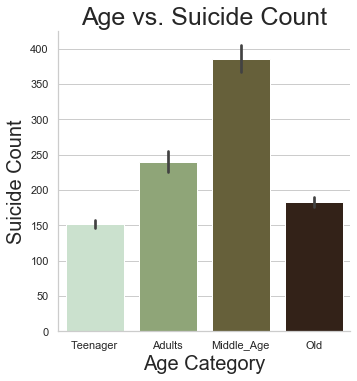

In [41]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.95", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

## Task 5: Gender and No of Suicides relation?

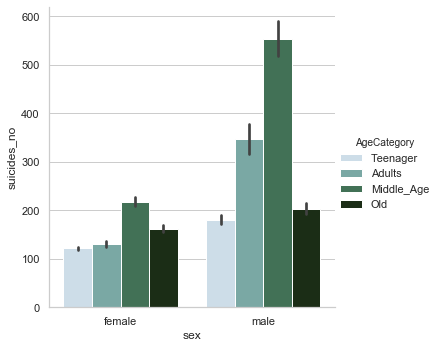

In [51]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", palette='ch:1.65',data=data);